# Maximal Margin Classifier and Soft Margin Classifier

We can use a line in order to separate data in a binary classification problem. This line could be a curve, or even a curved plane when the feature space is p-dimensional. We call it **separating hyperplane**.

For predicting a new value, we simply replace the values of data in the equation and see if the result is above or below zero. **The larger the distance of the result value from 0** (which represent a point exactly on the line) **, the stronger the confidence**.

Since there could be infinite lines to divide the two classes, we look for the **line which maximises the distance with the closest point**. This line is called <span style="color:blue">**Maximal Margin Classifier**</span>. The points used to establish this lines are called <span style="color:blue">**Support Vectors**</span>, since they support the behavior of the line and have vectorial form in p-dimensional spaces. The distance between the classifier and the support vectors is called **Margin**.

This can be formalized as follows:

$max_{\beta_0,\dots,\beta_p} M$ is the **objective**

$\Sigma_{j = 1}^p \beta_j^2 = 1$ is the **constraint**. This forces the final value to be the Carthesian distance between $x_i$ and the hyperplane.

If we define the class as $y \in \{-1;1\}$, we can use a single inequality to express both cases (since the sign will be switched when $y = -1$)

$$\forall i \in \{1,\dots,n\}, y_i(\beta_0 + \beta_1x_{i,1} + \dots + \beta_px_{i,p}) \geq M$$

**Note: this is valid only for binary classification problems, since the sign trick won't work for multiple classes!**

Given that equation, we can now define support vectors as the points for which the following equation is verified:

$$\forall i \in \{1,\dots,n\}, y_i(\beta_0 + \beta_1x_{i,1} + \dots + \beta_px_{i,p}) = M$$

Given this assumption, we have now two problems:

* If data is not perfectly separable, we cannot use this technique

* The model has **high variance** since adding/removing a support vector can greatly vary the hyperplane shape.

In order to avoid those problems, we can use a **soft margin**, being tolerant for misclassified values and values that fall between the margin. This new technique is called **soft margin classifier** or <span style="color:blue">**Support Vector Classifier**</span>.

In order to take this new options in account, we add an **error coefficient** $\epsilon$ for each of n observation (note that, instead, we only have p $\beta$ ). The equation is changes as:

$$\forall i \in \{1,\dots,n\}, y_i(\beta_0 + \beta_1x_{i,1} + \dots + \beta_px_{i,p}) \geq M(1 - \epsilon_i)$$

with the additional condition $\forall i \in \{1,\dots,n\}, \epsilon_i \geq 0$ and $\Sigma^n_{j = 1}\epsilon_j = C$, where $C$ is the **toleration budget** of the model. For $C = 0$ we have a maximal margin classifier, since no errors are tolerated. Note that if C = 1 there could be no misclassifications, but some values could fall inside the margin.

**The larger the C, the larger the number of support vectors and the lower the variance (but possibly the higher the bias!)**

The soft margin classifier **can always be learned**, as opposed to the MMC. They are both robust with respect to **trivial observation**, aka observations that are not support vectors. This is not the case for trees, since they are based on the number of errors in observations instead of using only pivotal ones.

# Support Vector Machines

The equation for the decision boundary can be generalized as

$$f(x^*) = \beta_0 + \Sigma^n_{i = 1}\alpha_iK(x^*, x_i)$$

Where $K(x^*, x_i)$ is a function called **kernel** that, given two p-sized arrays, return a value. Basically, K represent the scalar product between a new value that should be predicted and all the support vectors of the model. 

The intuition for kernel is to **map nonlinear data from a space of p dimension to a space of $p'$ dimensions (with $p' > p$) in which data can be divided with a linear decision boundary**. The axis of this new space represent the distance between the observation and the relative support vectors. Since an hyperplane in this space represent a distance, on the base plane this corresponds to a **round-like shape around the support vector of a specific class**. $\alpha_i$ defines the hyperplane in R p'.

Different types of kernel exists: the most commonly used is the **radial kernel** (also called RBF or Gaussian Kernel). Graphically, it is a round shape which tries to isolate class values around different support vector. The **polynomial kernel** is a d-degree line which passes around support vectors.

To use SVM on multiclass classification problems, we have two possible approaches:

* **one-vs-one**: We learn a binary classifier for each pair of classes ($\frac{K (K - 1)}{2}$ for K classes), and then we choose the most frequently predicted class.

* **one-vs-all**: We learn a binary classifier for each class K against all the others (y = 1 for the chosen class, y = -1 for all the others, K classifiers in total). We estimate the probability for each classifier and choose the classifier with highest value.


# Laboratory: SVM on Iris

In [78]:
library("dplyr")
library("e1071")
library("ggplot2")
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [4]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [66]:
iris_binary <- iris %>% mutate(Class = factor(ifelse(Species == "versicolor", 
                                                  "versicolor",
                                                  "no_versicolor")))
summary(iris_binary)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species             Class    
 setosa    :50   no_versicolor:100  
 versicolor:50   versicolor   : 50  
 virginica :50                      
                                    
                                    
                                    

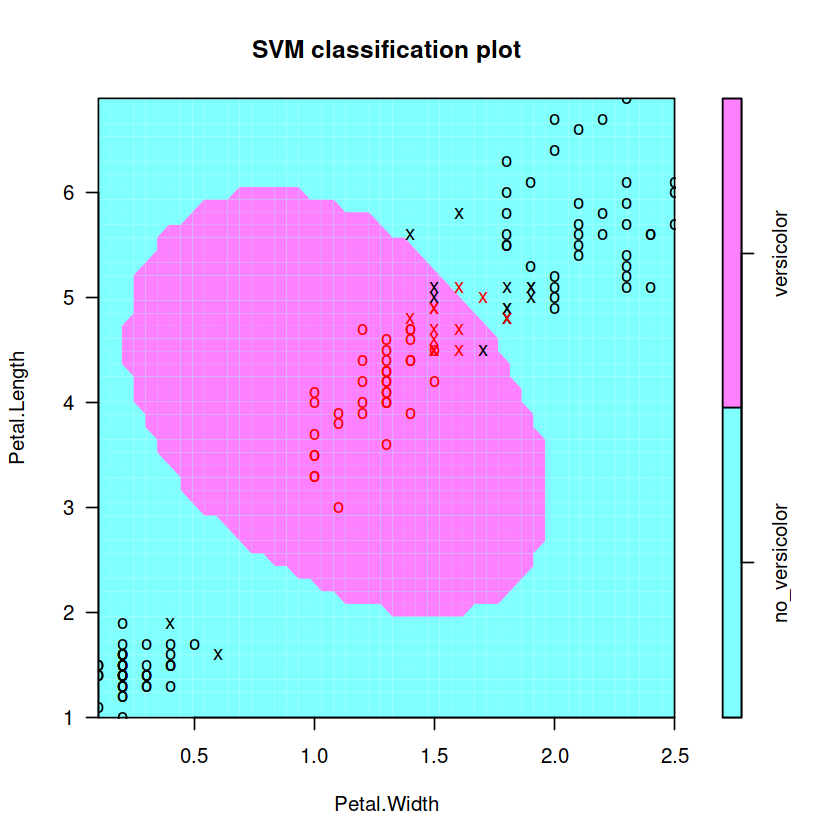

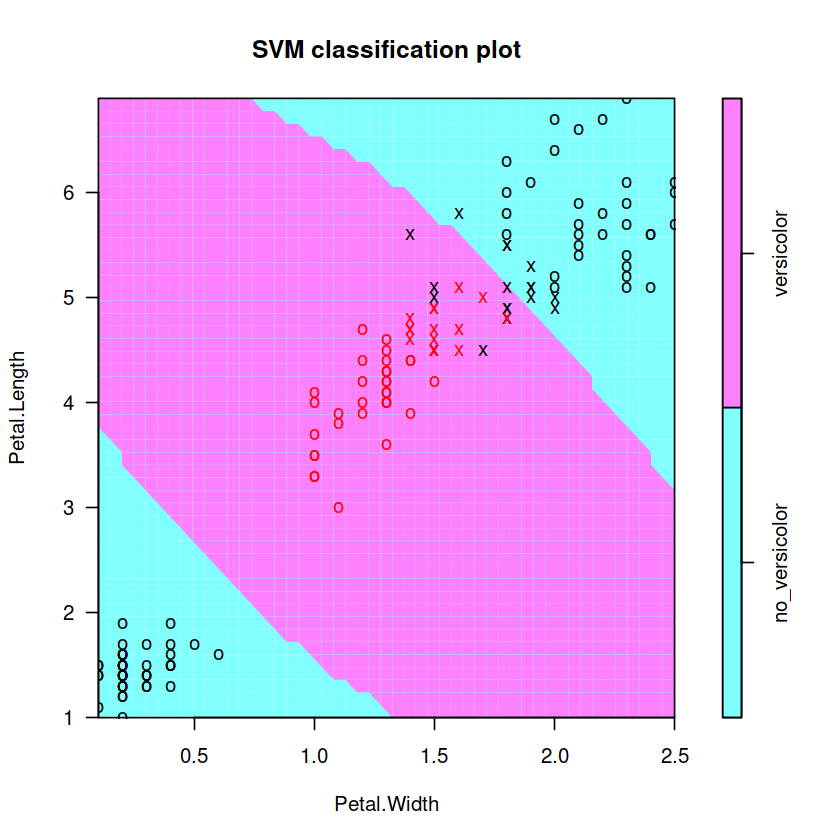

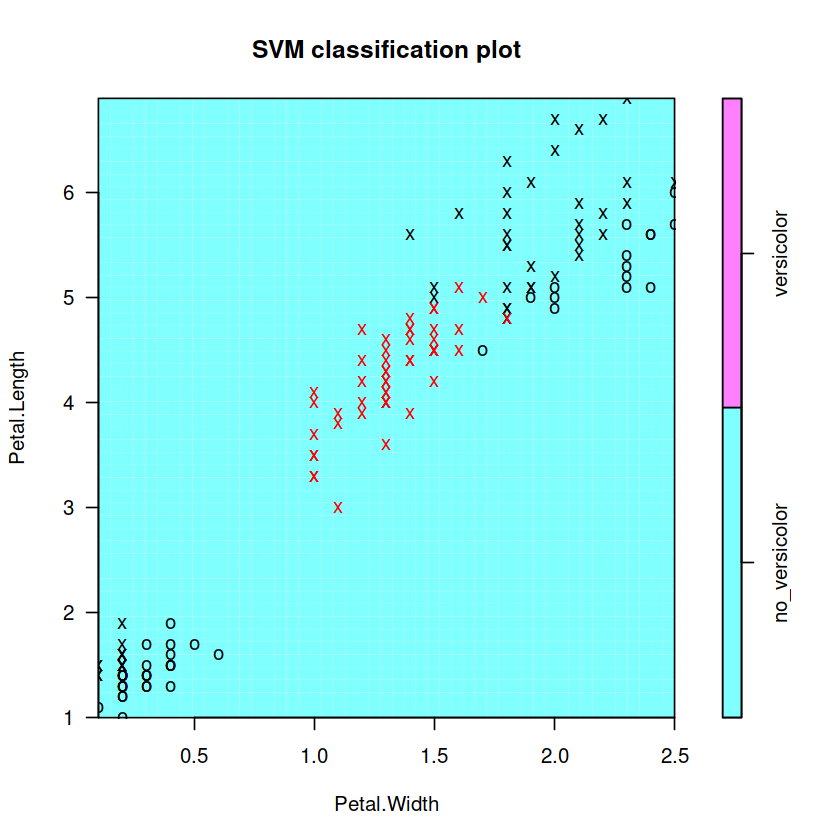

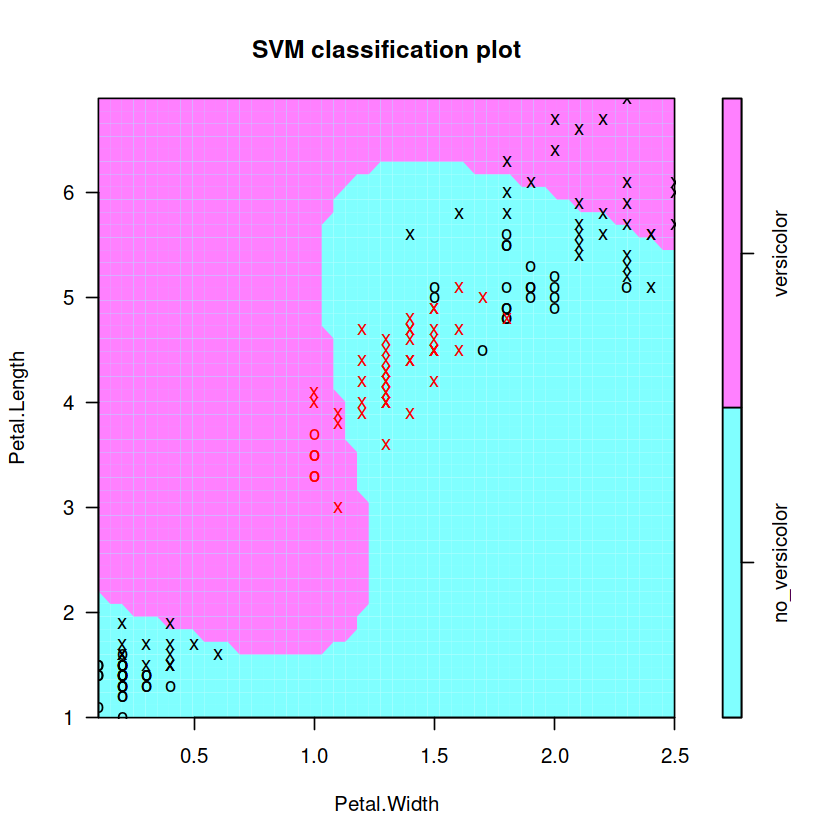

In [67]:
model_radial <- svm(Class ~ Petal.Length + Petal.Width, data = iris_binary)
model_polynomial  <- svm(Class ~ Petal.Length + Petal.Width, data = iris_binary, kernel="polynomial", degree=6)
model_linear  <- svm(Class ~ Petal.Length + Petal.Width, data = iris_binary, kernel="linear")
model_sigmoid  <- svm(Class ~ Petal.Length + Petal.Width, data = iris_binary, kernel="sigmoid")

par(mfrow=c(2,2))

plot(model_radial, iris_binary[,c(3,4,6)])
plot(model_polynomial, iris_binary[,c(3,4,6)])
plot(model_linear, iris_binary[,c(3,4,6)])
plot(model_sigmoid, iris_binary[,c(3,4,6)])

In [99]:
# Try to unbalance data heavily
uiris <- iris_binary[-c(61:100),]
summary(u_iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.200   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.000   1st Qu.:2.900   1st Qu.:1.500   1st Qu.:0.200  
 Median :5.700   Median :3.100   Median :4.500   Median :1.400  
 Mean   :5.825   Mean   :3.171   Mean   :3.585   Mean   :1.158  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.475   3rd Qu.:2.000  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species             Class    
 setosa    :50   no_versicolor:100  
 versicolor:10   versicolor   : 10  
 virginica :50                      
                                    
                                    
                                    

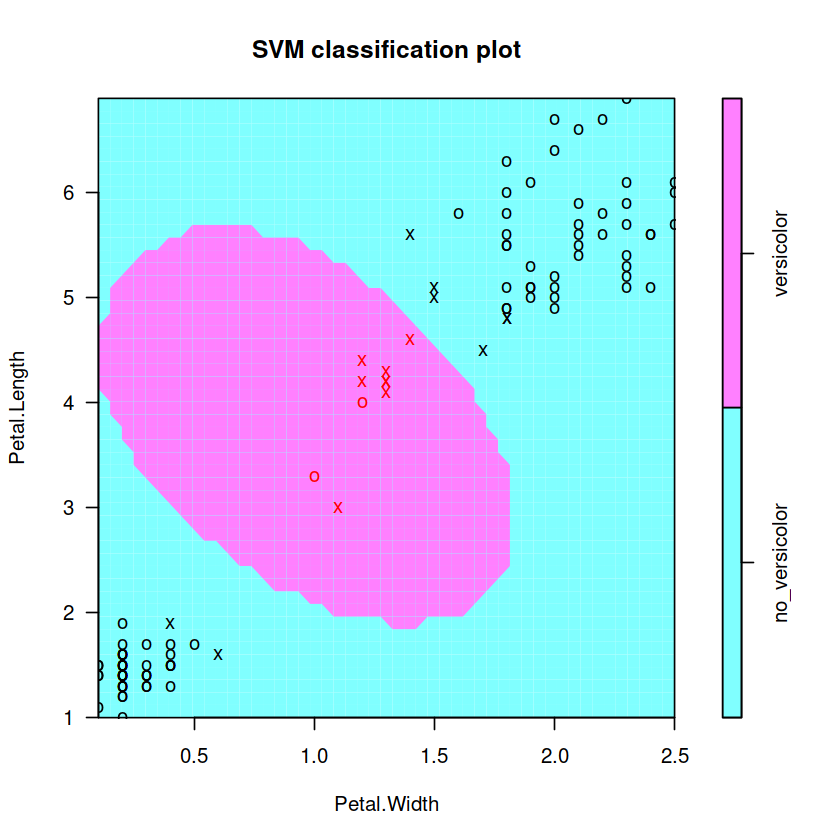

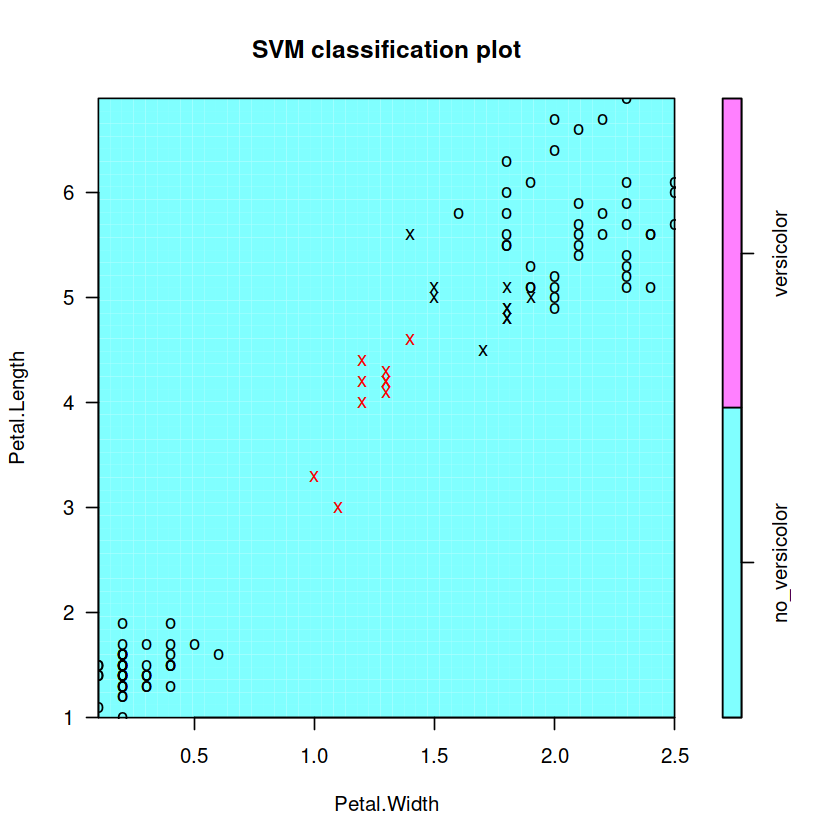

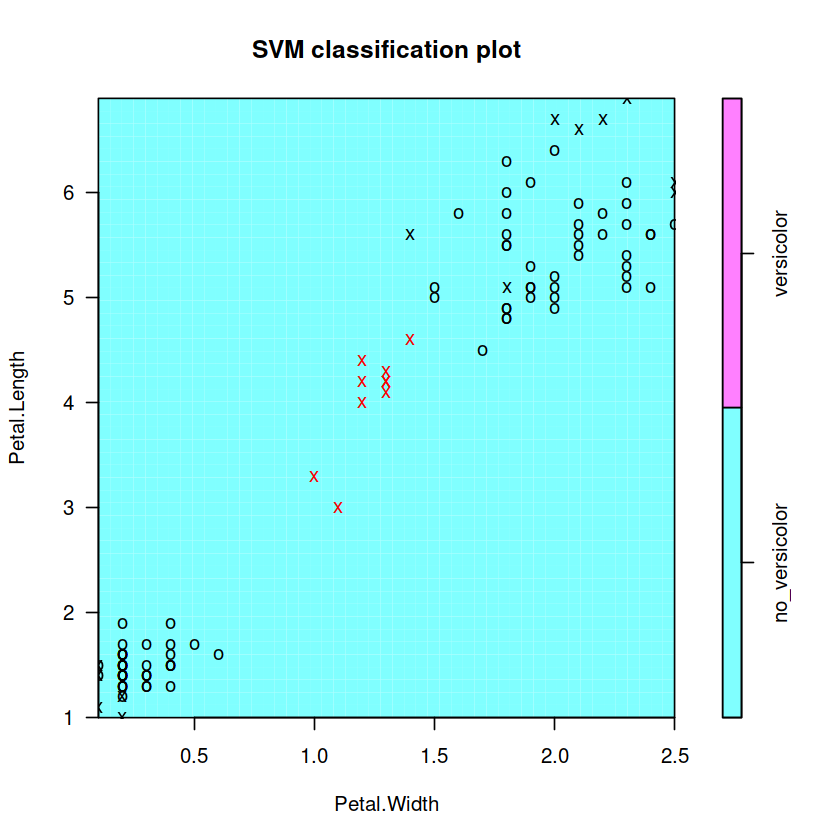

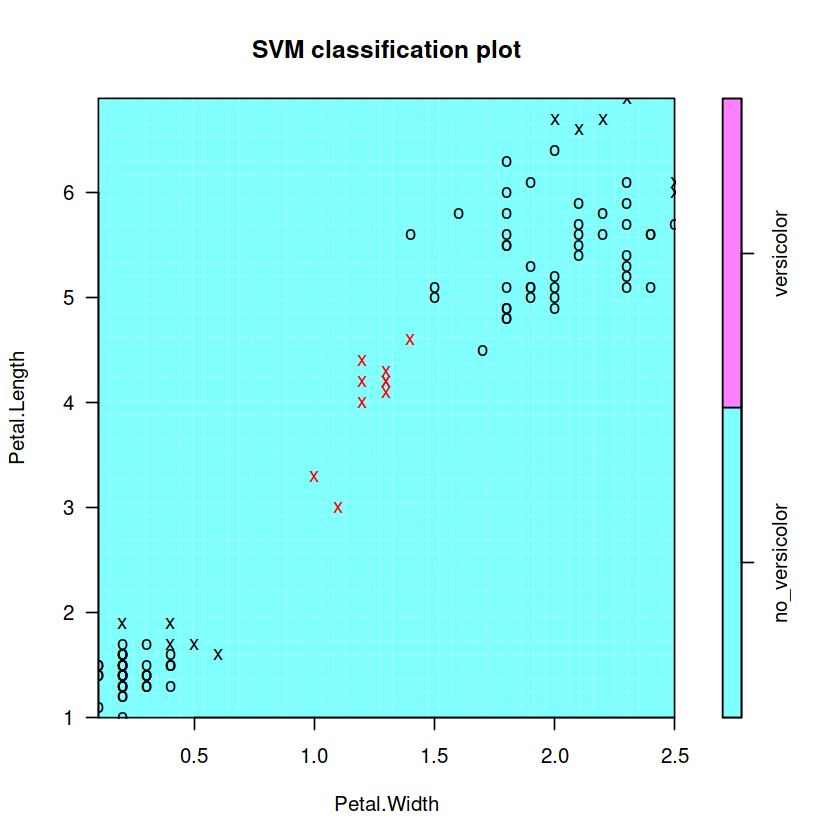

In [90]:
u_model_radial <- svm(Class ~ Petal.Length + Petal.Width, data = uiris)
u_model_polynomial  <- svm(Class ~ Petal.Length + Petal.Width, data = uiris, kernel="polynomial", degree=6)
u_model_linear  <- svm(Class ~ Petal.Length + Petal.Width, data = uiris, kernel="linear")
u_model_sigmoid  <- svm(Class ~ Petal.Length + Petal.Width, data = uiris, kernel="sigmoid")

par(mfrow=c(2,2))

plot(u_model_radial, uiris[,c(3,4,6)])
plot(u_model_polynomial, uiris[,c(3,4,6)])
plot(u_model_linear, uiris[,c(3,4,6)])
plot(u_model_sigmoid, uiris[,c(3,4,6)])

In [91]:
table(predict(model_radial, iris_binary), iris_binary$Class)
table(predict(u_model_radial, uiris), uiris$Class)

               
                no_versicolor versicolor
  no_versicolor            97          2
  versicolor                3         48

               
                no_versicolor versicolor
  no_versicolor           100          0
  versicolor                0         10

In [92]:
forest  <- randomForest(Class ~ Petal.Length + Petal.Width, data = iris_binary)
u_forest  <- randomForest(Class ~ Petal.Length + Petal.Width, data = uiris)

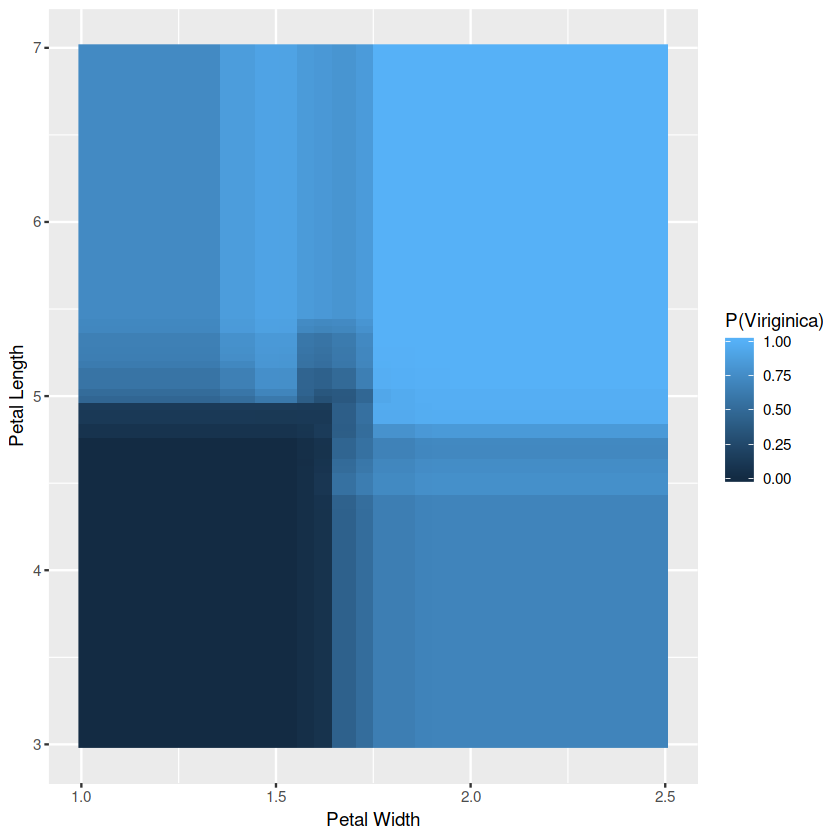

In [93]:
plane_iris = expand.grid(Petal.Length = seq(3.0, 7.0, length.out=100), 
                         Petal.Width = seq(1.0, 2.5, length.out=100))

pred <- predict(forest, plane_iris, type="prob")

ggplot(data = plane_iris, aes(x=Petal.Width, y=Petal.Length, fill=pred[,1])) +
  geom_raster() +
labs(fill = "P(Viriginica)", 
       x="Petal Width", 
       y="Petal Length")


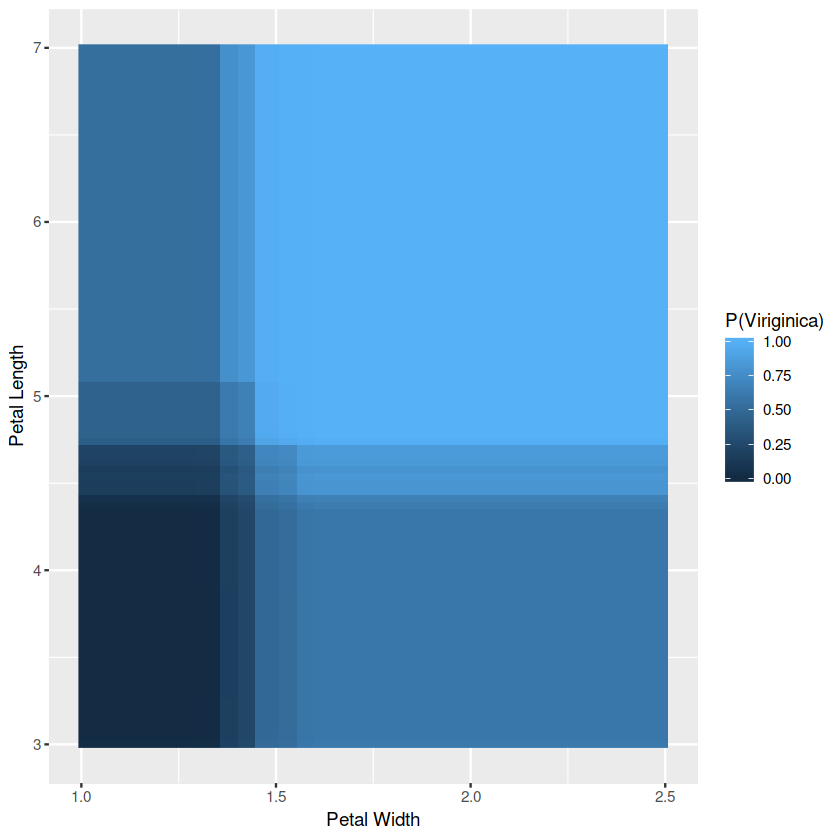

In [94]:
pred <- predict(u_forest, plane_iris, type="prob")

ggplot(data = plane_iris, aes(x=Petal.Width, y=Petal.Length, fill=pred[,1])) +
  geom_raster() +
labs(fill = "P(Viriginica)", 
       x="Petal Width", 
       y="Petal Length")

In [95]:
table(predict(forest, iris_binary), iris_binary$Class)
table(predict(u_forest, uiris), uiris$Class)

               
                no_versicolor versicolor
  no_versicolor           100          1
  versicolor                0         49

               
                no_versicolor versicolor
  no_versicolor           100          0
  versicolor                0         10

We observe that in general random forest achieve a better performance for this particular case, both in an unbalanced and an heavily unbalanced case.